# Predicting Heart Disease using Machine Learning: A Classification Approach

Qasim Khawaja, Manan Daga, Nolan Vu, Aarav Mahajan

# Introduction

Heart disease is a major health issue and a leading cause of death globally. It is estimated that over 17 million people die from cardiovascular disease every year. Early detection and prevention are crucial in managing the risk factors associated with heart disease, including high blood pressure, high cholesterol, and smoking.

Machine learning techniques have shown promise in predicting heart disease and identifying the risk factors. By analyzing patient data, including medical history, physical examination, and diagnostic tests, machine learning models can learn patterns and make predictions about the likelihood of developing heart disease.

Building a classifier for heart disease can aid in identifying patients who may be at risk and allow for early intervention and treatment. With advancements in machine learning and data analysis, building an accurate classifier for heart disease has the potential to save lives and improve overall health outcomes.

Using the Heart Disease dataset obtained from the UCI Machine Learning Repository: the heart disease dataset from Cleveland, USA our goal is to accurately predict whether a patient has heart disease based on our selected predictor variables. This dataset includes the following columns:
+ `age`: Age (in years)
+ `sex`: Sexuality (1 = male; 0 = female)
+ `cp`: chest pain type (4 values: 1 = typical angina, 2 = atypical angina, 3 = non-angina pain, 4 = asymptomatic angina)
+ `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
+ `chol`: serum cholestoral in mg/dl
+ `fbs`: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
+ `restecg`: resting electrocardiographic results (values 0,1,2)
+ `thalach`: maximum heart rate achieved
+ `exang`: exercise induced angina (1 = yes; 0 = no)
+ `oldpeak`: ST depression induced by exercise relative to rest
+ `slope`: the slope of the peak exercise ST segment
+ `ca`: number of major vessels (0-3) colored by flourosopy
+ `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect
+ `target`: (0 = no heart disease, 1,2,3,4 = has heart disease)

For our preliminary data analysis, the variables that we will be looking at are age, cholesterol level, resting blood pressure and chest pain. Based on the data trained with these variables, a prediction for whether a patient has heart disease or not(which is represented by `target`, with 0 meaning that the patient doesn't have any heart diseases, and 1,2,3,4 meaning otherwise, with the severity of the disease represented by the numbers - the larger the number, the more severe the disease is). This is due to the fact that a study done by Vanderpump, (Vanderpump et al., 2009) on risk factors for cardiovascular disease has found that the aforementioned variables are much more relevant than other variables in predicting whether a patient has heart diseases. However, the Forward Selection Method will also be used to determine the best predictors of this data.

After having done all the steps mentioned above, as the best combination of predictor varibles have been determined, we can finally use them to build our classifier to predict whether or not a patient has heart disease by using the K-Nearest Neighbours classifier algorithm. To assess the accuracy of our classifier, we will reserve and use a test dataset to see if our classifier works well or not.

# METHODS

The following report consists of:

1. Preliminary data analysis
   - Cleaning, tidying, and manipulating data into training and testing sets using our chosen predictors to be used for the K-NN Classifier
2. Predictor Variable Selection Process
   - Using the Foward Selection Method to find the best variables for making s prediction that will be used in our classifier
3. Creating our K-NN Classifier 
   - Using cross validation to find the best value of k
   - creating a model with the calculated k value and a recipe from the predictors identified by Forward Selection

# Results
   - Discussion about the steps we made with the intention of evaluating its accuracy and effectiveness for application in real life  

# Preliminary Data Anylisis


In [1]:
install.packages("GGally")
install.packages("ISLR")
install.packages("cowplot")
install.packages("gridExtra")

also installing the dependency ‘reshape’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
# Loading the packages that are essentials in running our functions
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(tidymodels)
library(GGally)
library(ISLR)
library(dplyr)
library(gridExtra)
library(RColorBrewer)
library(cowplot)

options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

Warning message:
“package ‘ggplot2’ was built under R version 4.1.3”
Warning message:
“package ‘tidyr’ was built under R version 4.1.2”
Warning message:
“package ‘readr’ was built under R version 4.1.2”
Warning message:
“package ‘dplyr’ was built under R version 4.1.3”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘testthat’ was built under R version 4.1.3”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following objects are masked from ‘package:readr’:

    edition_get, local_edition


The following ob

**Importing data from the web**

In the code cell below, we will read the dataset straight from the URL. We will be naming the dataset  `heart_disease_data`

In [3]:
heart_disease_data <- read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
                              ,col_names = FALSE)
heart_disease_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Figure 1: Dataset without column names*

As we can see, the data set doesn't have name for the columns, so we will be adding them first.

In [4]:
colnames(heart_disease_data) <- c("age", "sex", "cp","trestbps",
                                   "chol", "fbs", "restecg", "thalach",
                                   "exang", "oldpeak", "slope", "ca", "thal", "target")
heart_disease_data                                   
                                   

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Figure 2: Dataset with column names*

**Cleaning and tidying the dataset**

First, we will check for duplicate rows in the data, then remove them to avoid biased prediction.


In [5]:
heart_disease_data_distinct <- distinct(heart_disease_data)
heart_disease_data_distinct

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Figure 3: Dataset without duplicate rows*

We can see that the number of rows in the dataset doesn't change as after we have filtered for distinct rows. This means that our dataset doesn't have any duplicate rows.

Now we will select the colums that we are interested in and tidy the dataset up. Note that the target column tell us the presence of heart disease, with 0 meaning there is no heart disease and 1,2,3,4 meaning otherwise. As representing the presence of heart disease with numbers is somewhat not suitable, we will transform the values in `target` to words, of which 0 translates to `NO` and 1,2,3,4 all translate to `YES`. We also remove any na / "?" values and make `ca` and `thal` numerical.

In [6]:
heart_dis_clean <- heart_disease_data_distinct |>
    mutate (target = ifelse(target == 0, "NO", "YES")) |>
    filter(across(everything(), ~ !(. %in% c(NA, "?")))) |>
    mutate(ca = as.numeric(ca), thal = as.numeric(thal))
heart_dis_clean

Warning message:
“Using `across()` in `filter()` is deprecated, use `if_any()` or `if_all()`.”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,NO
67,1,4,160,286,0,2,108,1,1.5,2,3,3,YES
67,1,4,120,229,0,2,129,1,2.6,2,2,7,YES
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,YES
57,1,4,130,131,0,0,115,1,1.2,2,1,7,YES
57,0,2,130,236,0,2,174,0,0.0,2,1,3,YES


*Figure 4: Dataset transformed into a tidy format*

**Splitting Data into Training and Testing sets**

Now, we will separate our data into training and testing data. We do this because we want to train our classifier with the training data only, but the testing data will be useful in evaluating the classifier's accuracy.

First, we will set a seed so results are producible, and then summarize the training data to get a good idea of what we are working with.

In [7]:
# Splitting the dataframe into training and testing datasets
set.seed(1)

heart_dis_split <- initial_split(heart_dis_clean, prop = 0.75, strata = target)
heart_training <- training(heart_dis_split)
heart_testing <- testing(heart_dis_split)

heart_training

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,NO
37,1,3,130,250,0,0,187,0,3.5,3,0,3,NO
41,0,2,130,204,0,2,172,0,1.4,1,0,3,NO
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,YES
57,1,4,130,131,0,0,115,1,1.2,2,1,7,YES
57,0,2,130,236,0,2,174,0,0.0,2,1,3,YES


*Figure 5*: The training dataframe with 222 rows, 75% of the initial dataframe

## Summarizing

We are summarizing the continuous variables from the training data into the table below. The discrete values are best presented using visualizations.


In [8]:
# Summarizing training data into a table of min, max, mean
heart_sum <- heart_training |>
    select(target, age,trestbps,chol,thalach,oldpeak)|>
    group_by(target) |>
    summarize(across(everything(), mean))
heart_sum

target,age,trestbps,chol,thalach,oldpeak
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NO,52.57500,128.8417,245.3750,158.9500,0.5983333
YES,56.84314,136.5000,248.6176,138.6471,1.5990196


In [9]:
count <- heart_training |>
    group_by(target) |>
    summarize(count = n())
count

target,count
<chr>,<int>
NO,120
YES,102


*Figure 6: Summary table of the training dataset*

As seen from the summarized frame , the means for age, resting blood pressure, cholesterol level and oldpeak of those who are affected with the heart disease are all greater than those who don't have it. The reverse is true for thalach (maximum heart rate). This will provide valuable information for our classifier to make predictions on, and we can predict from this that our classifier will choose those who are generally older, with higher cholesterol, oldpeak and blood pressure levels to have heart disease. It might also classify people to have heart disease if they have lower thalach.

Additionally, we see that there are no singularities in our data table and the number of observations is distributed quite fairly, with the number of patients and non-patients quite close to each other.


## Visualisation

### Continuous Data

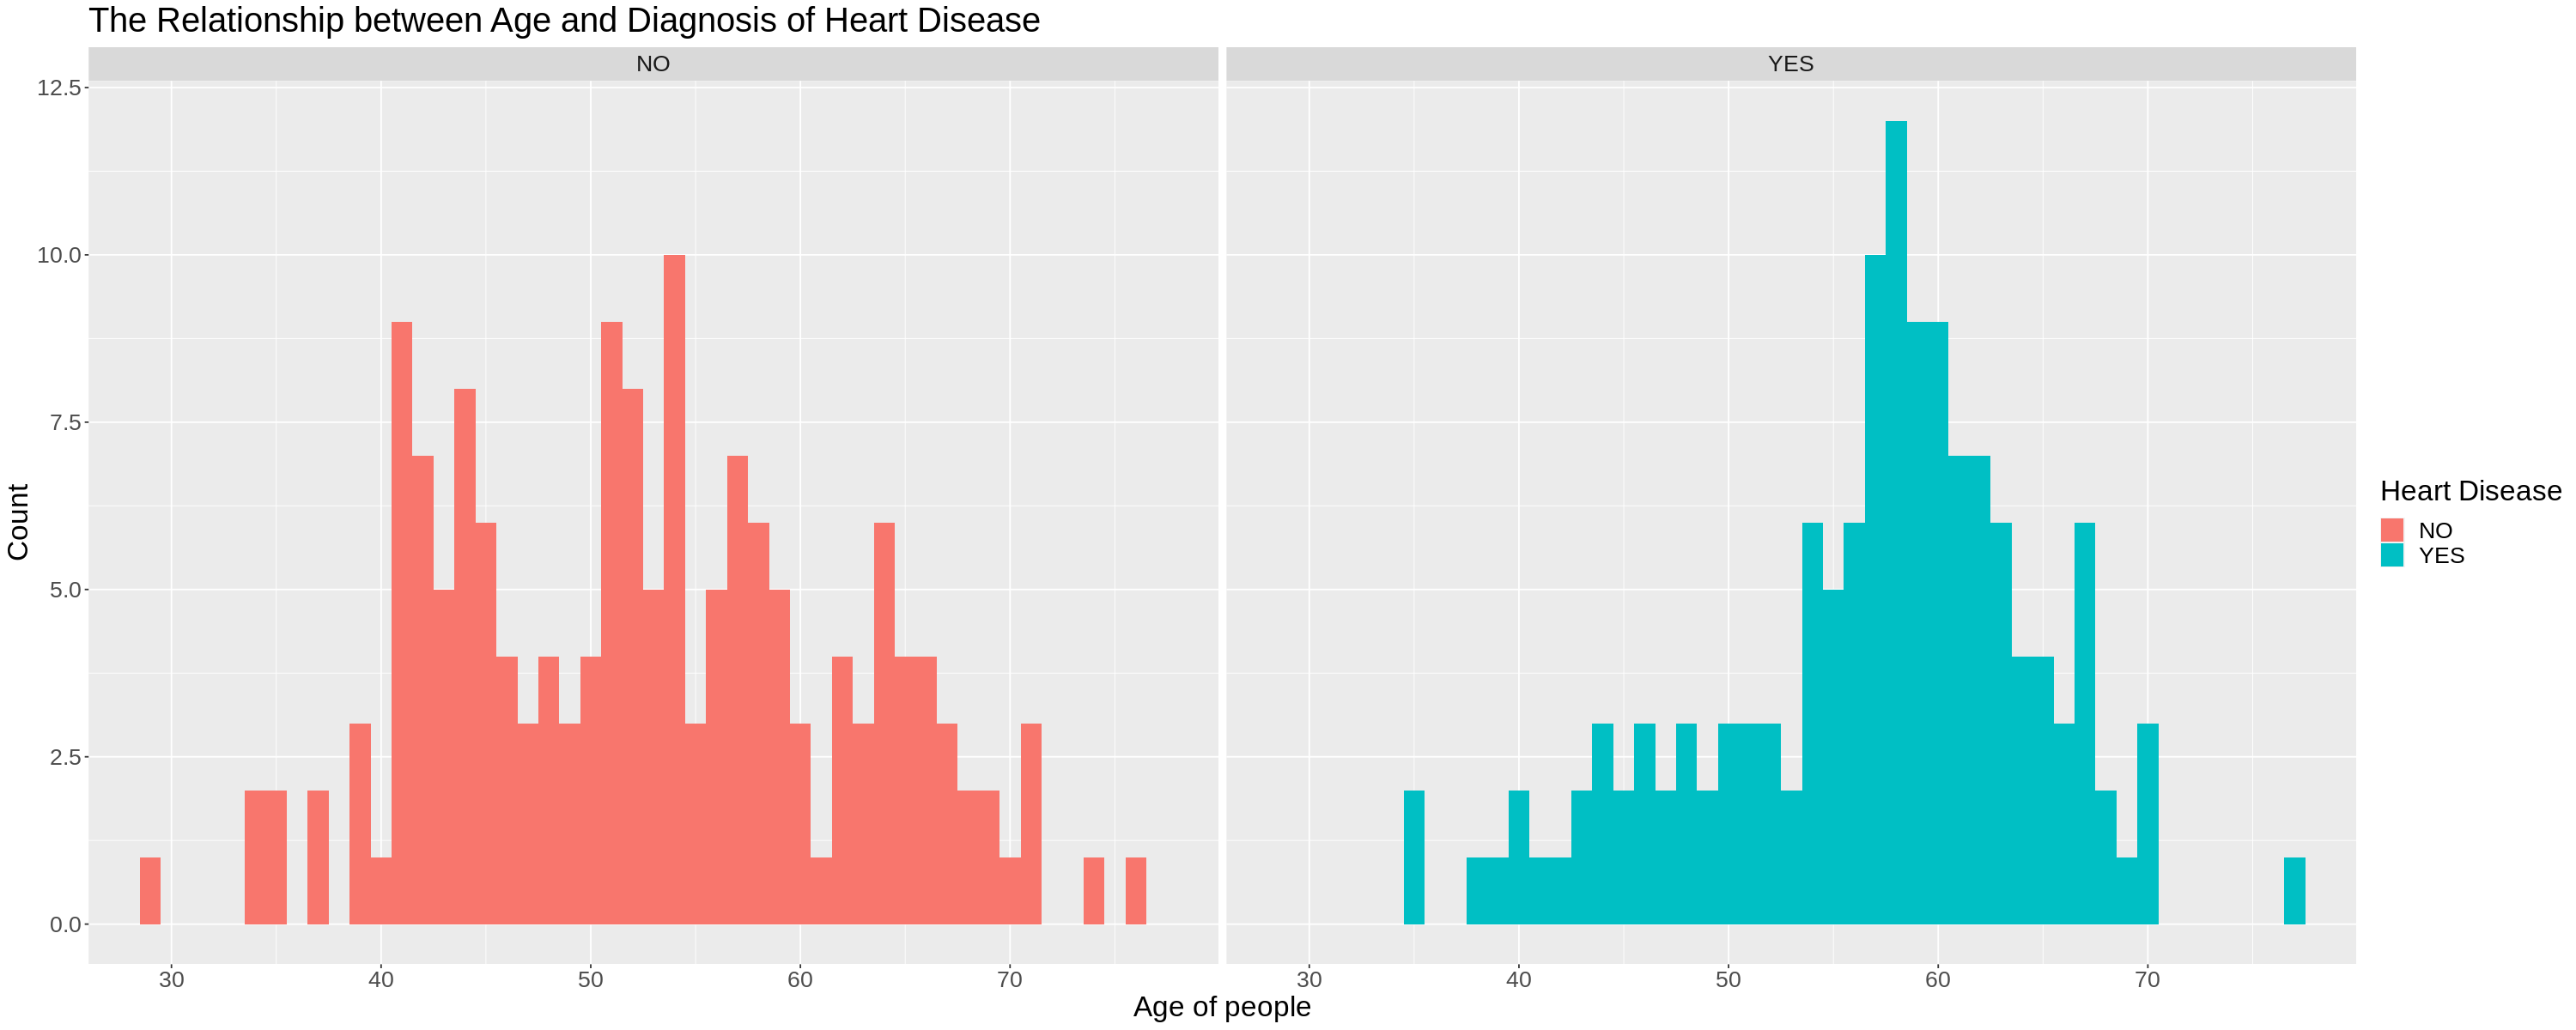

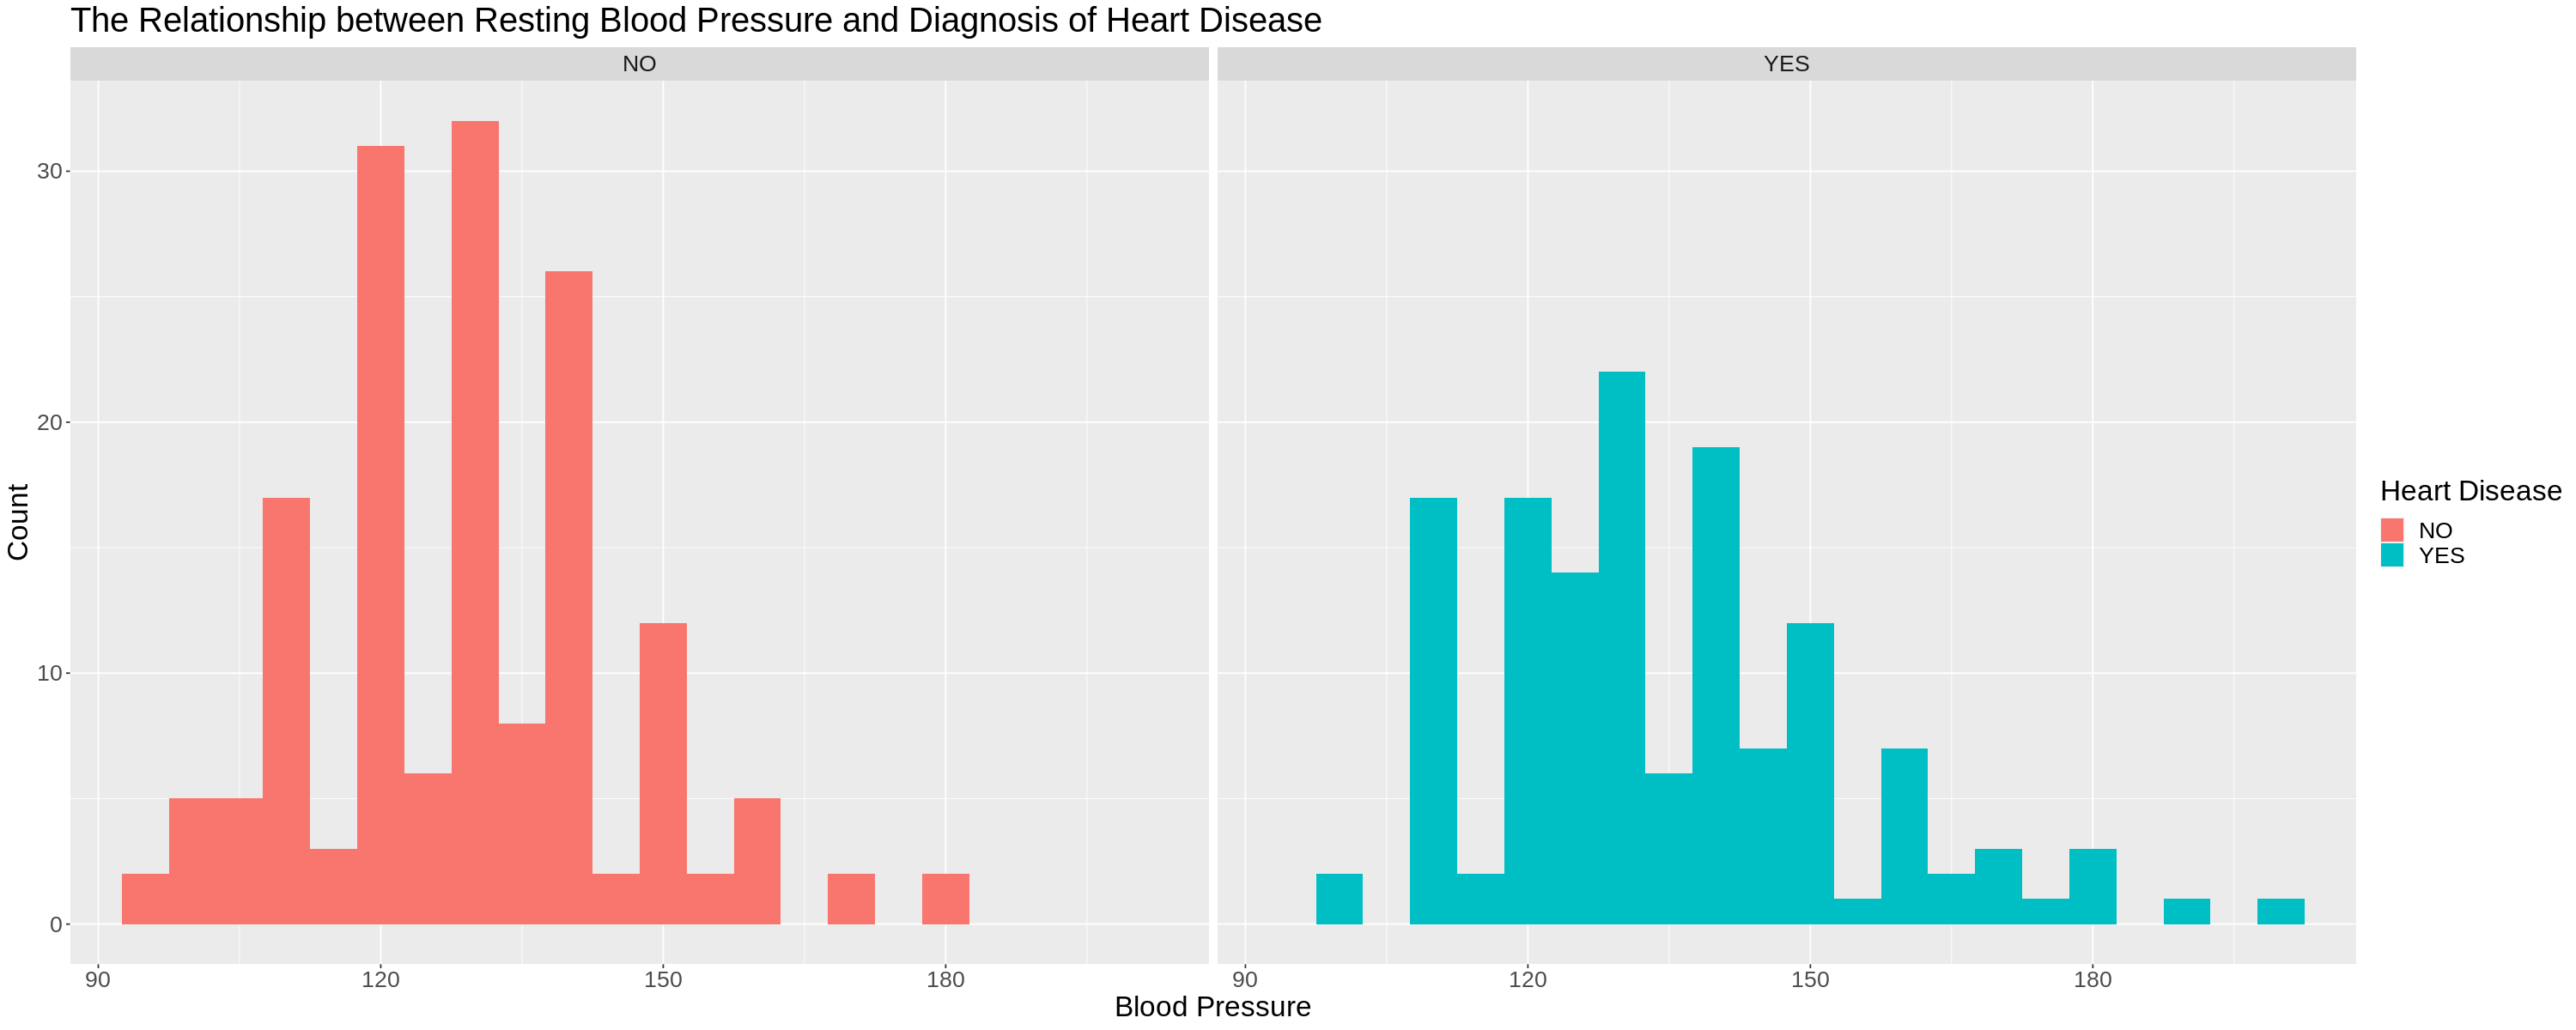

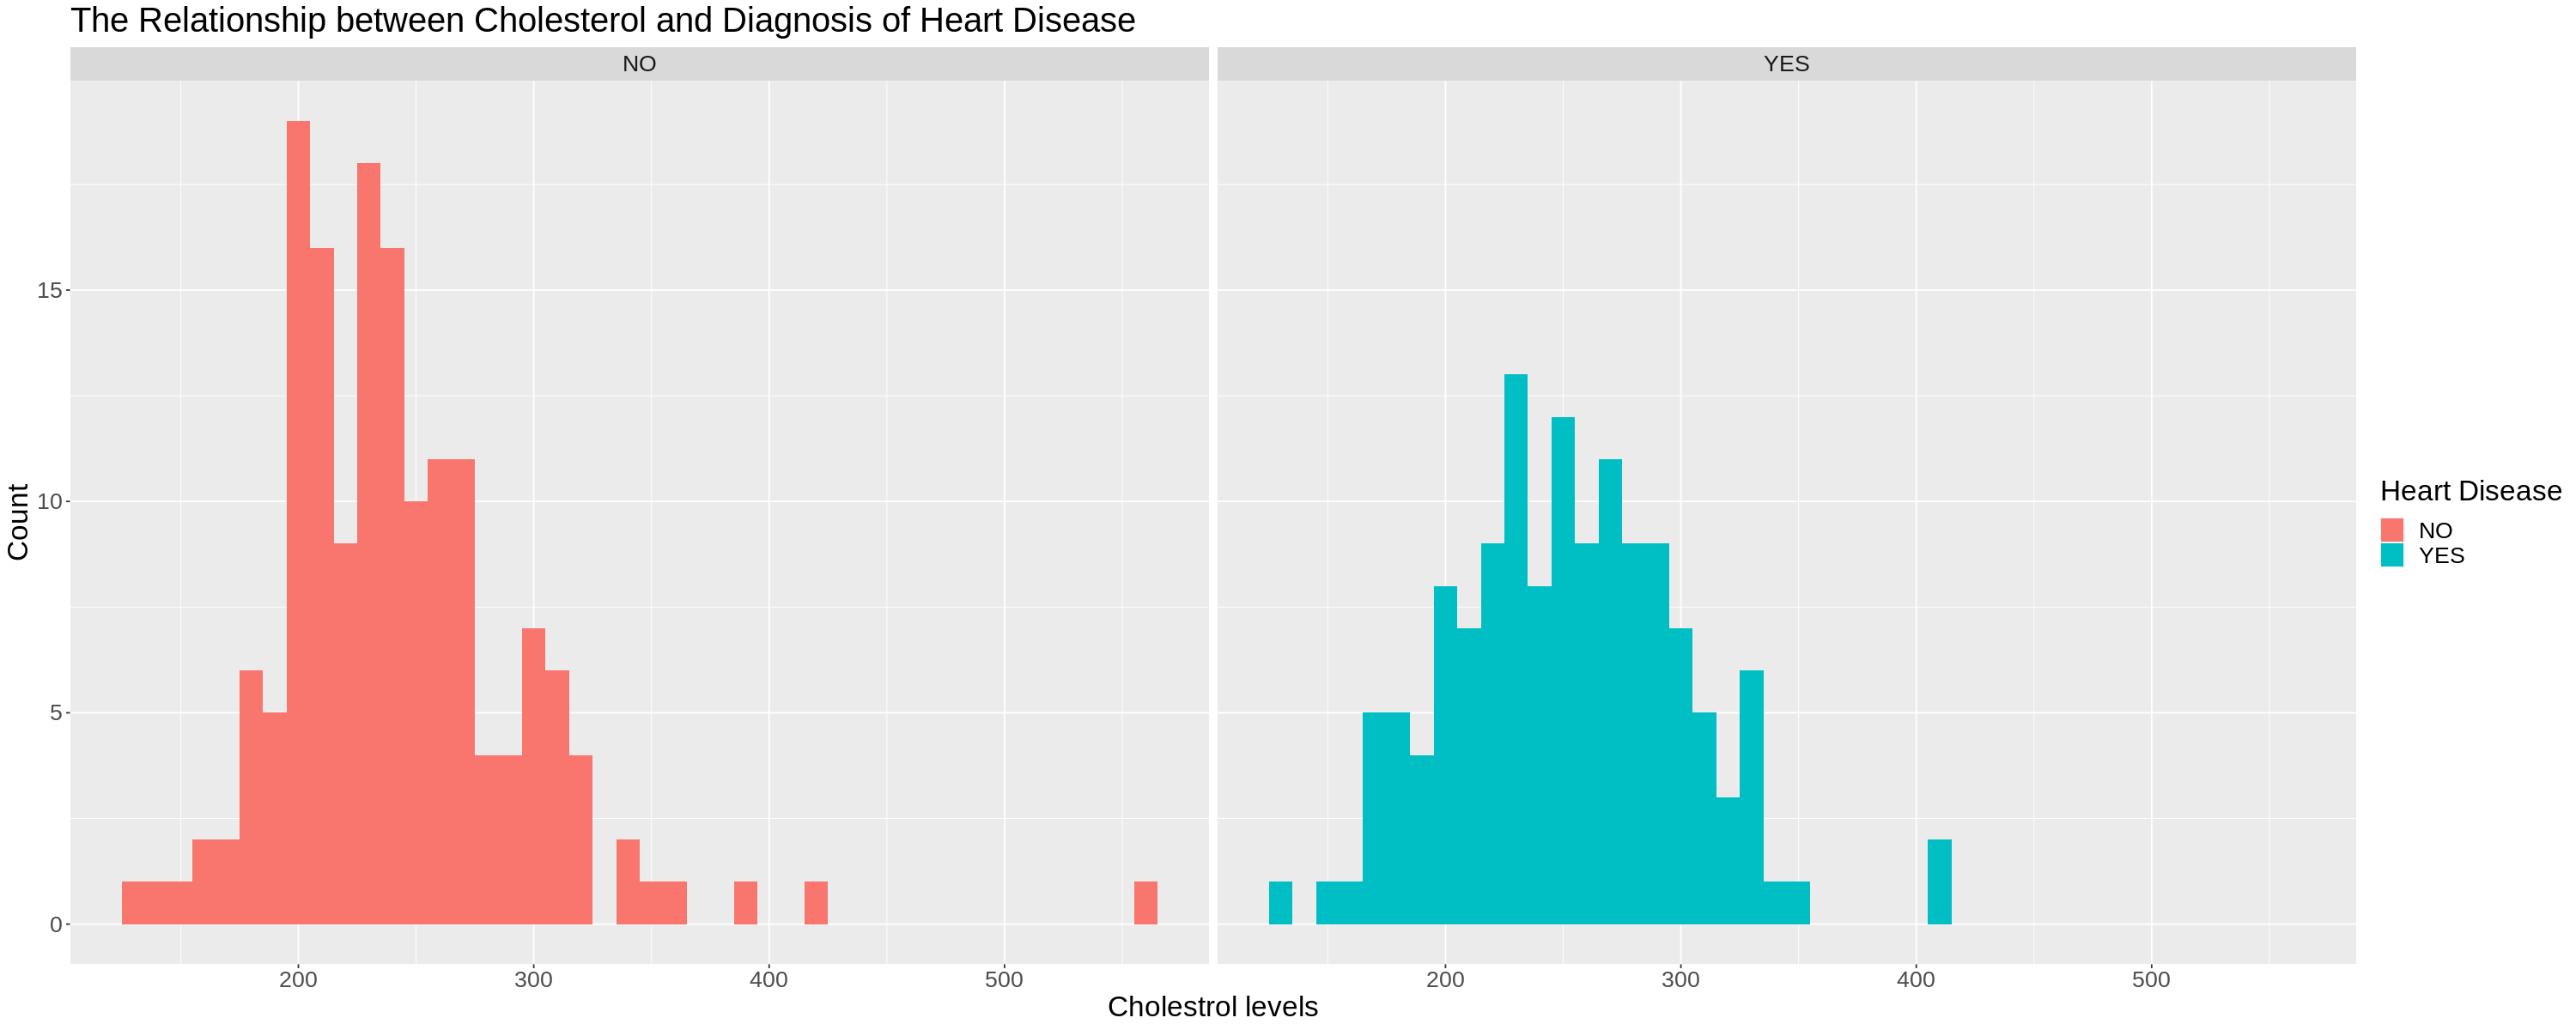

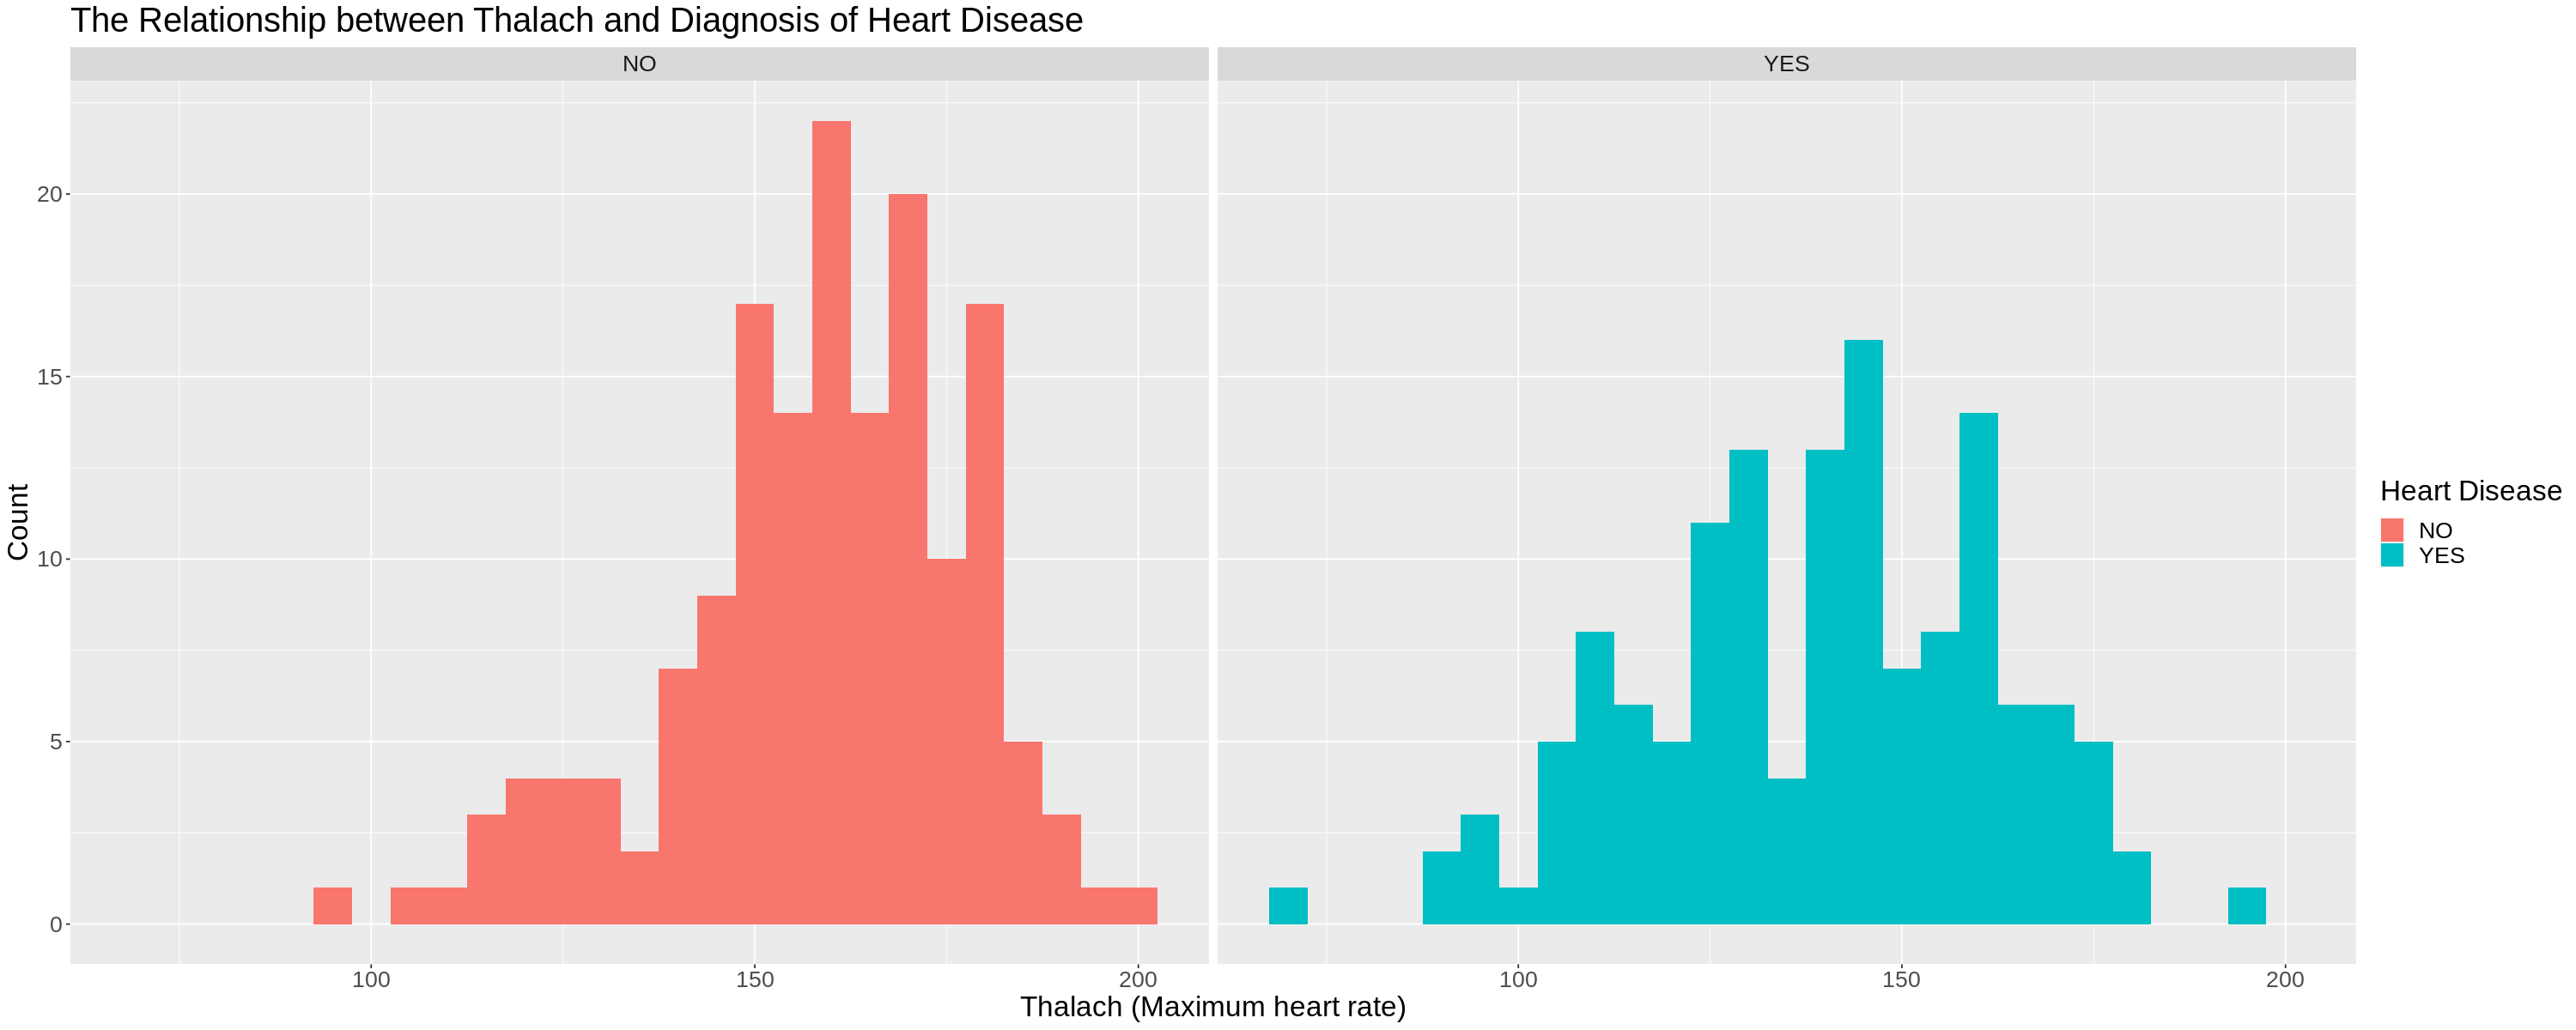

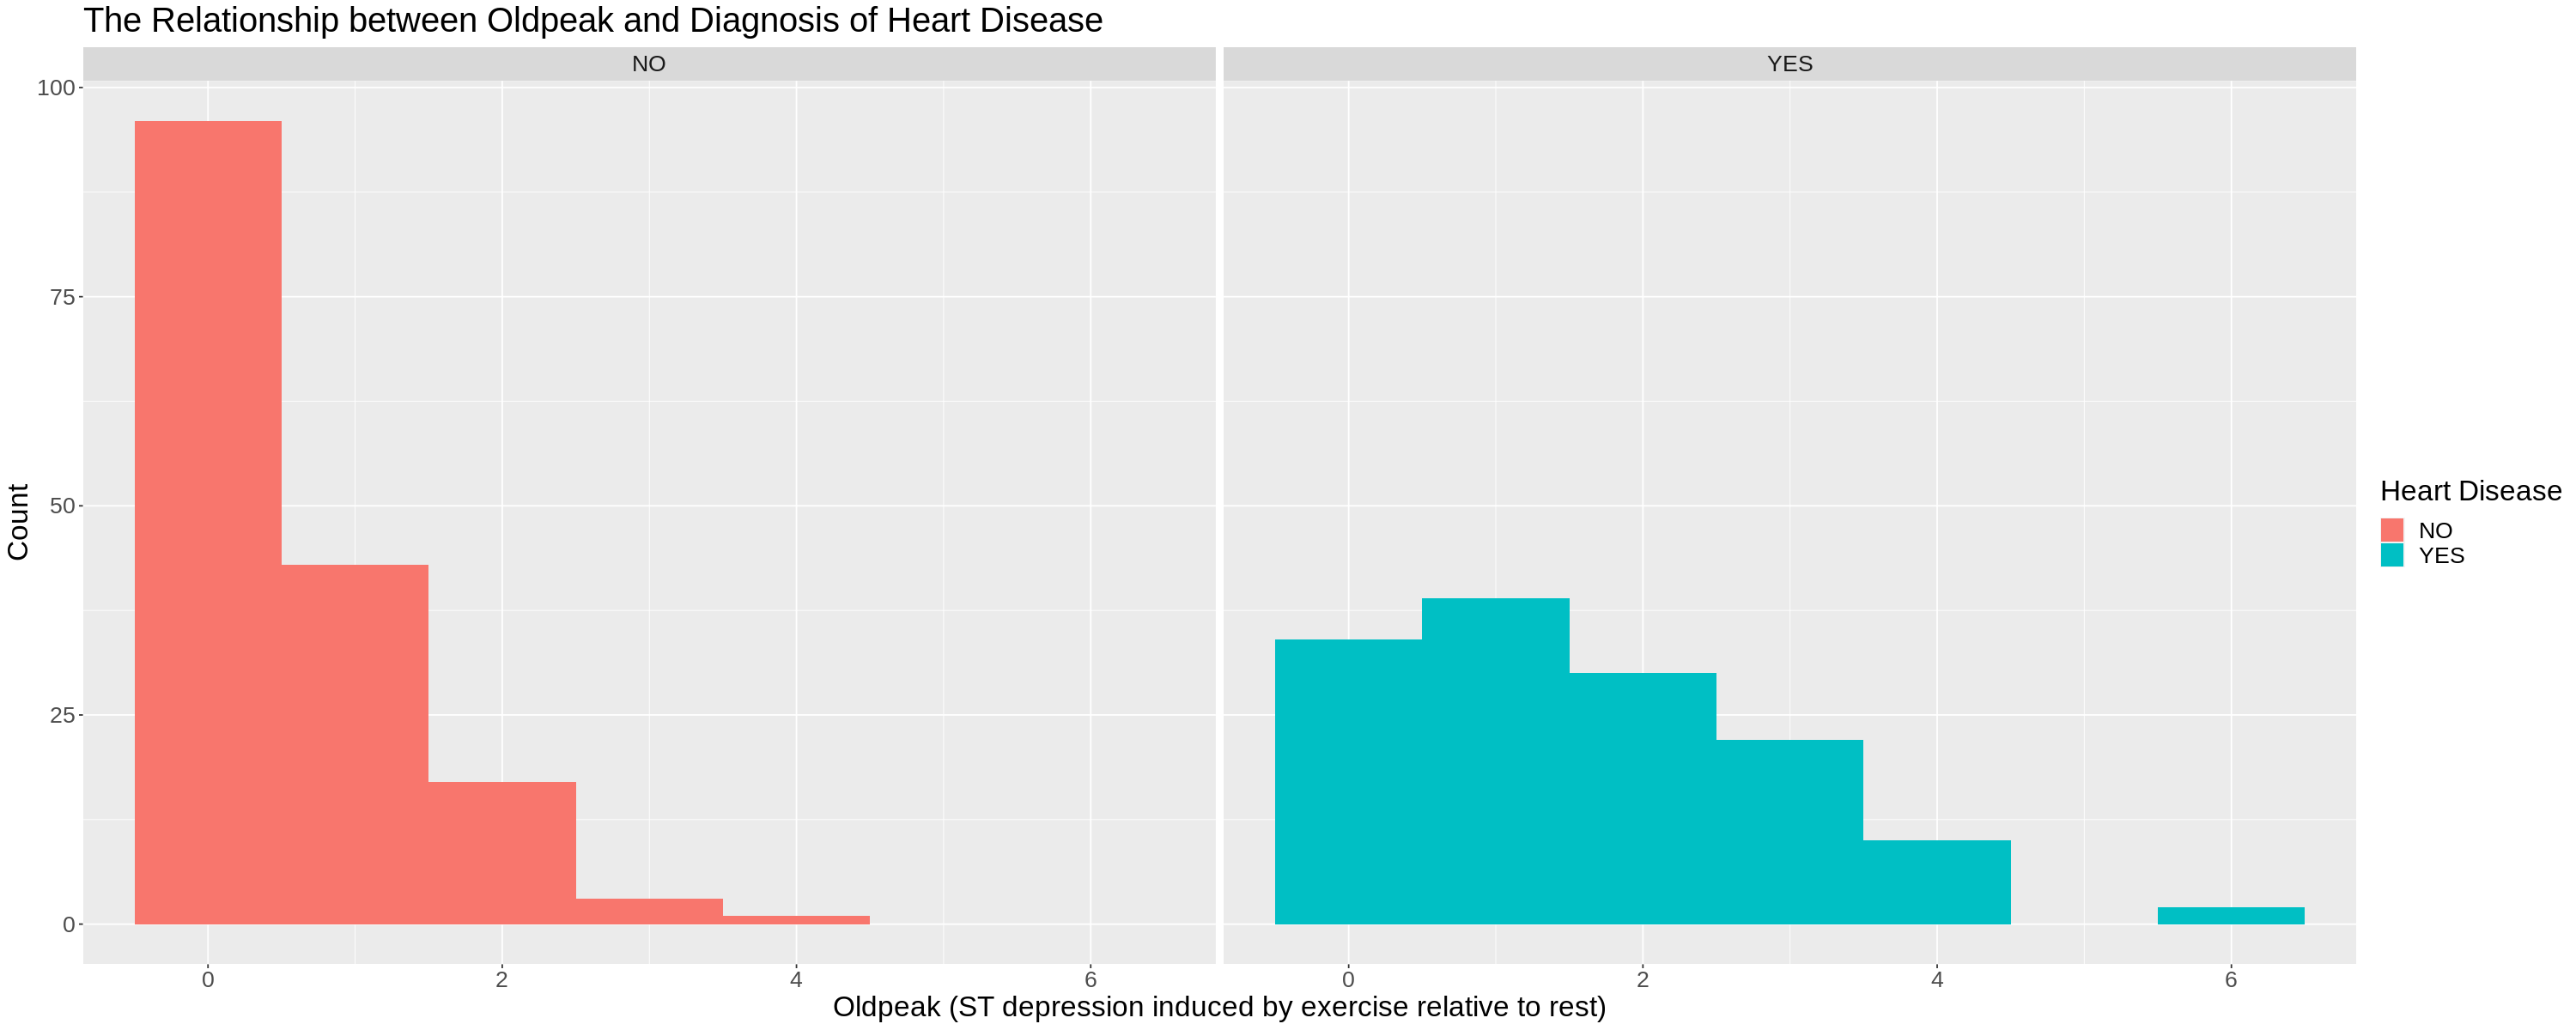

In [14]:
options(repr.plot.width = 25, repr.plot.height = 10)

age_plot <- heart_dis_clean |>
    ggplot(aes(x = age, fill = target))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols = vars(target))+
    ggtitle("The Relationship between Age and Diagnosis of Heart Disease")+
    labs(x = "Age of people", y = "Count", fill = "Heart Disease")+
    theme(text = element_text(size = 20))
age_plot

bps_plot <- heart_dis_clean |>
    ggplot(aes(x = trestbps, fill = target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols = vars(target))+
    ggtitle("The Relationship between Resting Blood Pressure and Diagnosis of Heart Disease")+
    labs(x = "Blood Pressure", y = "Count", fill = "Heart Disease")+
    theme(text = element_text(size = 20))
bps_plot

chol_plot <- heart_dis_clean |>
    ggplot(aes(x = chol, fill = target))+
    geom_histogram(binwidth = 10)+
    facet_grid(cols = vars(target))+
    ggtitle("The Relationship between Cholesterol and Diagnosis of Heart Disease")+
    labs(x = "Cholestrol levels", y = "Count", fill = "Heart Disease")+
    theme(text = element_text(size = 20))
chol_plot

thalach_plot <- heart_dis_clean |>
    ggplot(aes(x = thalach, fill = target))+
    geom_histogram(binwidth = 5)+
    facet_grid(cols = vars(target))+
    ggtitle("The Relationship between Thalach and Diagnosis of Heart Disease")+
    labs(x = "Thalach (Maximum heart rate)", y = "Count", fill = "Heart Disease")+
    theme(text = element_text(size = 20))
thalach_plot

oldpeak_plot <- heart_dis_clean |>
    ggplot(aes(x = oldpeak, fill = target))+
    geom_histogram(binwidth = 1)+
    facet_grid(cols = vars(target))+
    ggtitle("The Relationship between Oldpeak and Diagnosis of Heart Disease")+
    labs(x = "Oldpeak (ST depression induced by exercise relative to rest)", y = "Count", fill = "Heart Disease")+
    theme(text = element_text(size = 20))
oldpeak_plot

*[Figure 7]*

*[Figure 8]*

*[Figure 9]*

*[Figure 10]*

*[Figure 11]*

These figures describe the distribution of the continuous variables. Here, the general and clear trend is that the people with higher age and oldpeak, and the people with lower thalach have higher chance of a heart disease. For the other variables, it is not very clear.

### Categorical Data

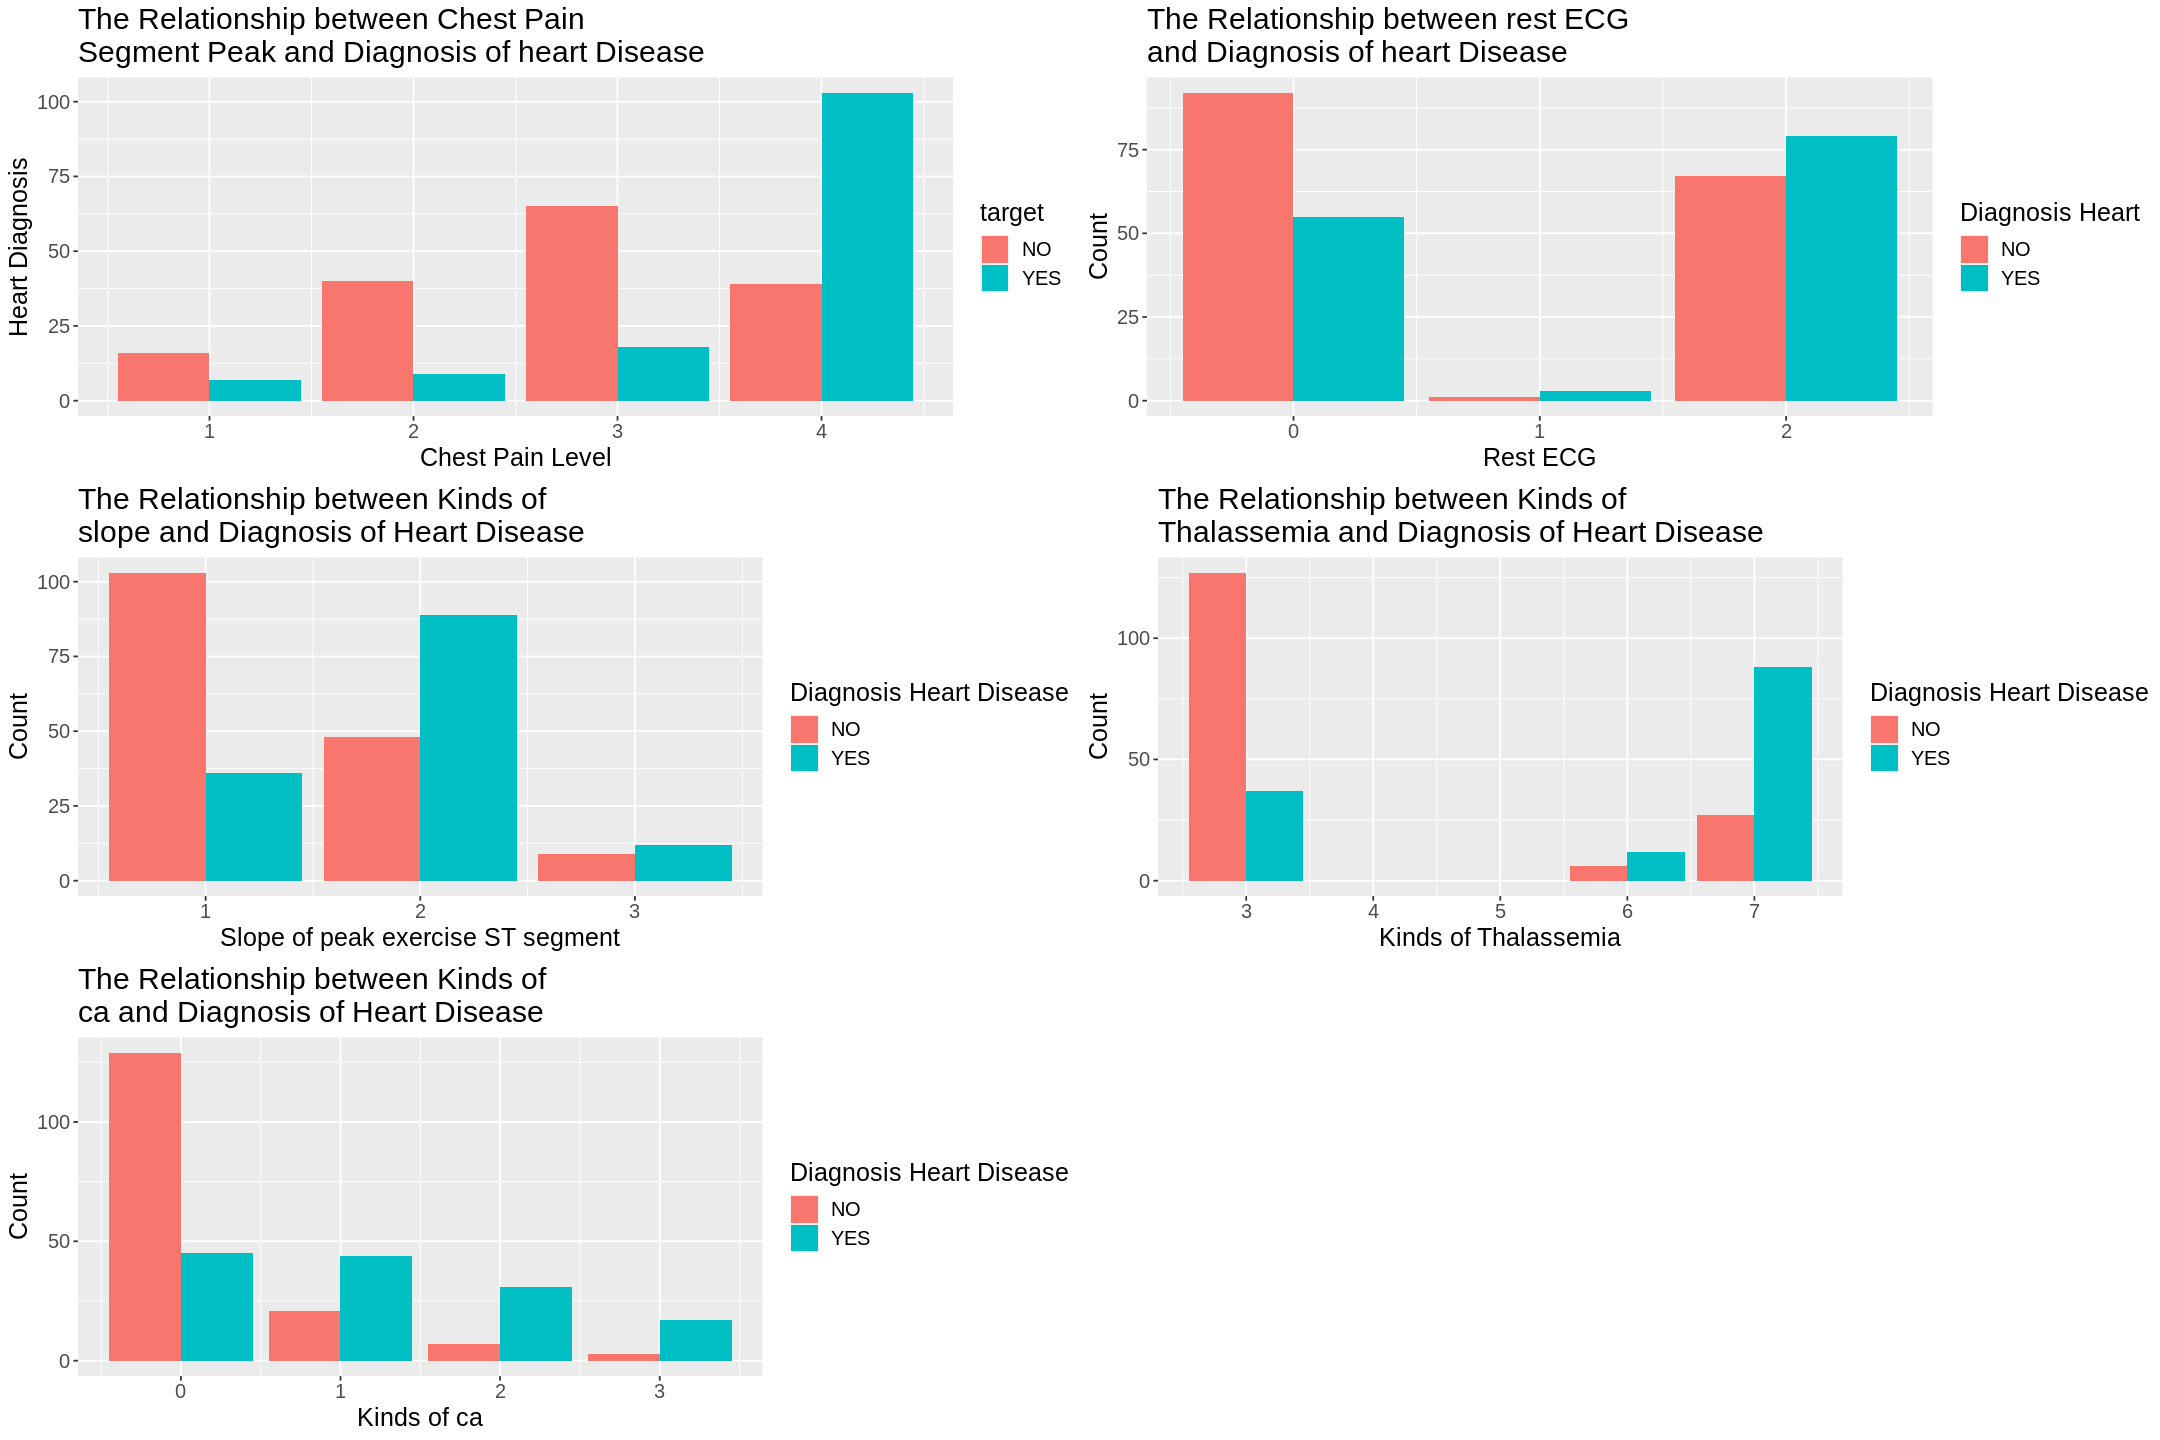

In [11]:
options(repr.plot.width = 18, repr.plot.height = 12)

cp_plot <- heart_dis_clean |>
    ggplot(aes(x = cp, fill = target)) +
    geom_bar(position = "dodge")+
    labs(x = "Chest Pain Level", y = "Heart Diagnosis", color = "Heart Diagnosis") +
    ggtitle("The Relationship between Chest Pain \nSegment Peak and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

restecg_plot <- heart_dis_clean |>
    ggplot(aes(x = restecg, fill = target)) +
    geom_bar(position = "dodge")+
    labs(x = "Rest ECG", y = "Count", fill = "Diagnosis Heart ")+
    ggtitle("The Relationship between rest ECG \nand Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

slope_plot <- heart_dis_clean |>
    ggplot(aes(x = slope, fill = target)) +
    geom_bar(position = "dodge")+
    labs(x = "Slope of peak exercise ST segment", y = "Count", fill = "Diagnosis Heart Disease")+
    ggtitle("The Relationship between Kinds of \nslope and Diagnosis of Heart Disease")+
    theme(text = element_text(size = 15))

thal_plot <- heart_dis_clean |>
    ggplot(aes(x = thal, fill = target)) +
    geom_bar(position = "dodge")+
    labs(x = "Kinds of Thalassemia", y = "Count", fill = "Diagnosis Heart Disease")+
    ggtitle("The Relationship between Kinds of \nThalassemia and Diagnosis of Heart Disease")+
    theme(text = element_text(size = 15))

ca_plot <- heart_dis_clean |>
    ggplot(aes(x = ca, fill = target)) +
    geom_bar(position = "dodge")+
    labs(x = "Kinds of ca", y = "Count", fill = "Diagnosis Heart Disease")+
    ggtitle("The Relationship between Kinds of \nca and Diagnosis of Heart Disease")+
    theme(text = element_text(size = 15))

grid.arrange(cp_plot, restecg_plot, slope_plot, thal_plot, ca_plot, nrow = 3)
     

*[Figure 12]*

*[Figure 13]*

*[Figure 14]*

*[Figure 15]*

*[Figure 16]*

These figures describe the distribution of the categorical variables with at least 3 categories. Here, the general and clear trend is that the people with higher chest pain level,  Slope of peak exercise ST segment, thalassemia and ca higher chance of a heart disease. For rest ECG, there isn't much of a difference.

### Binary Data

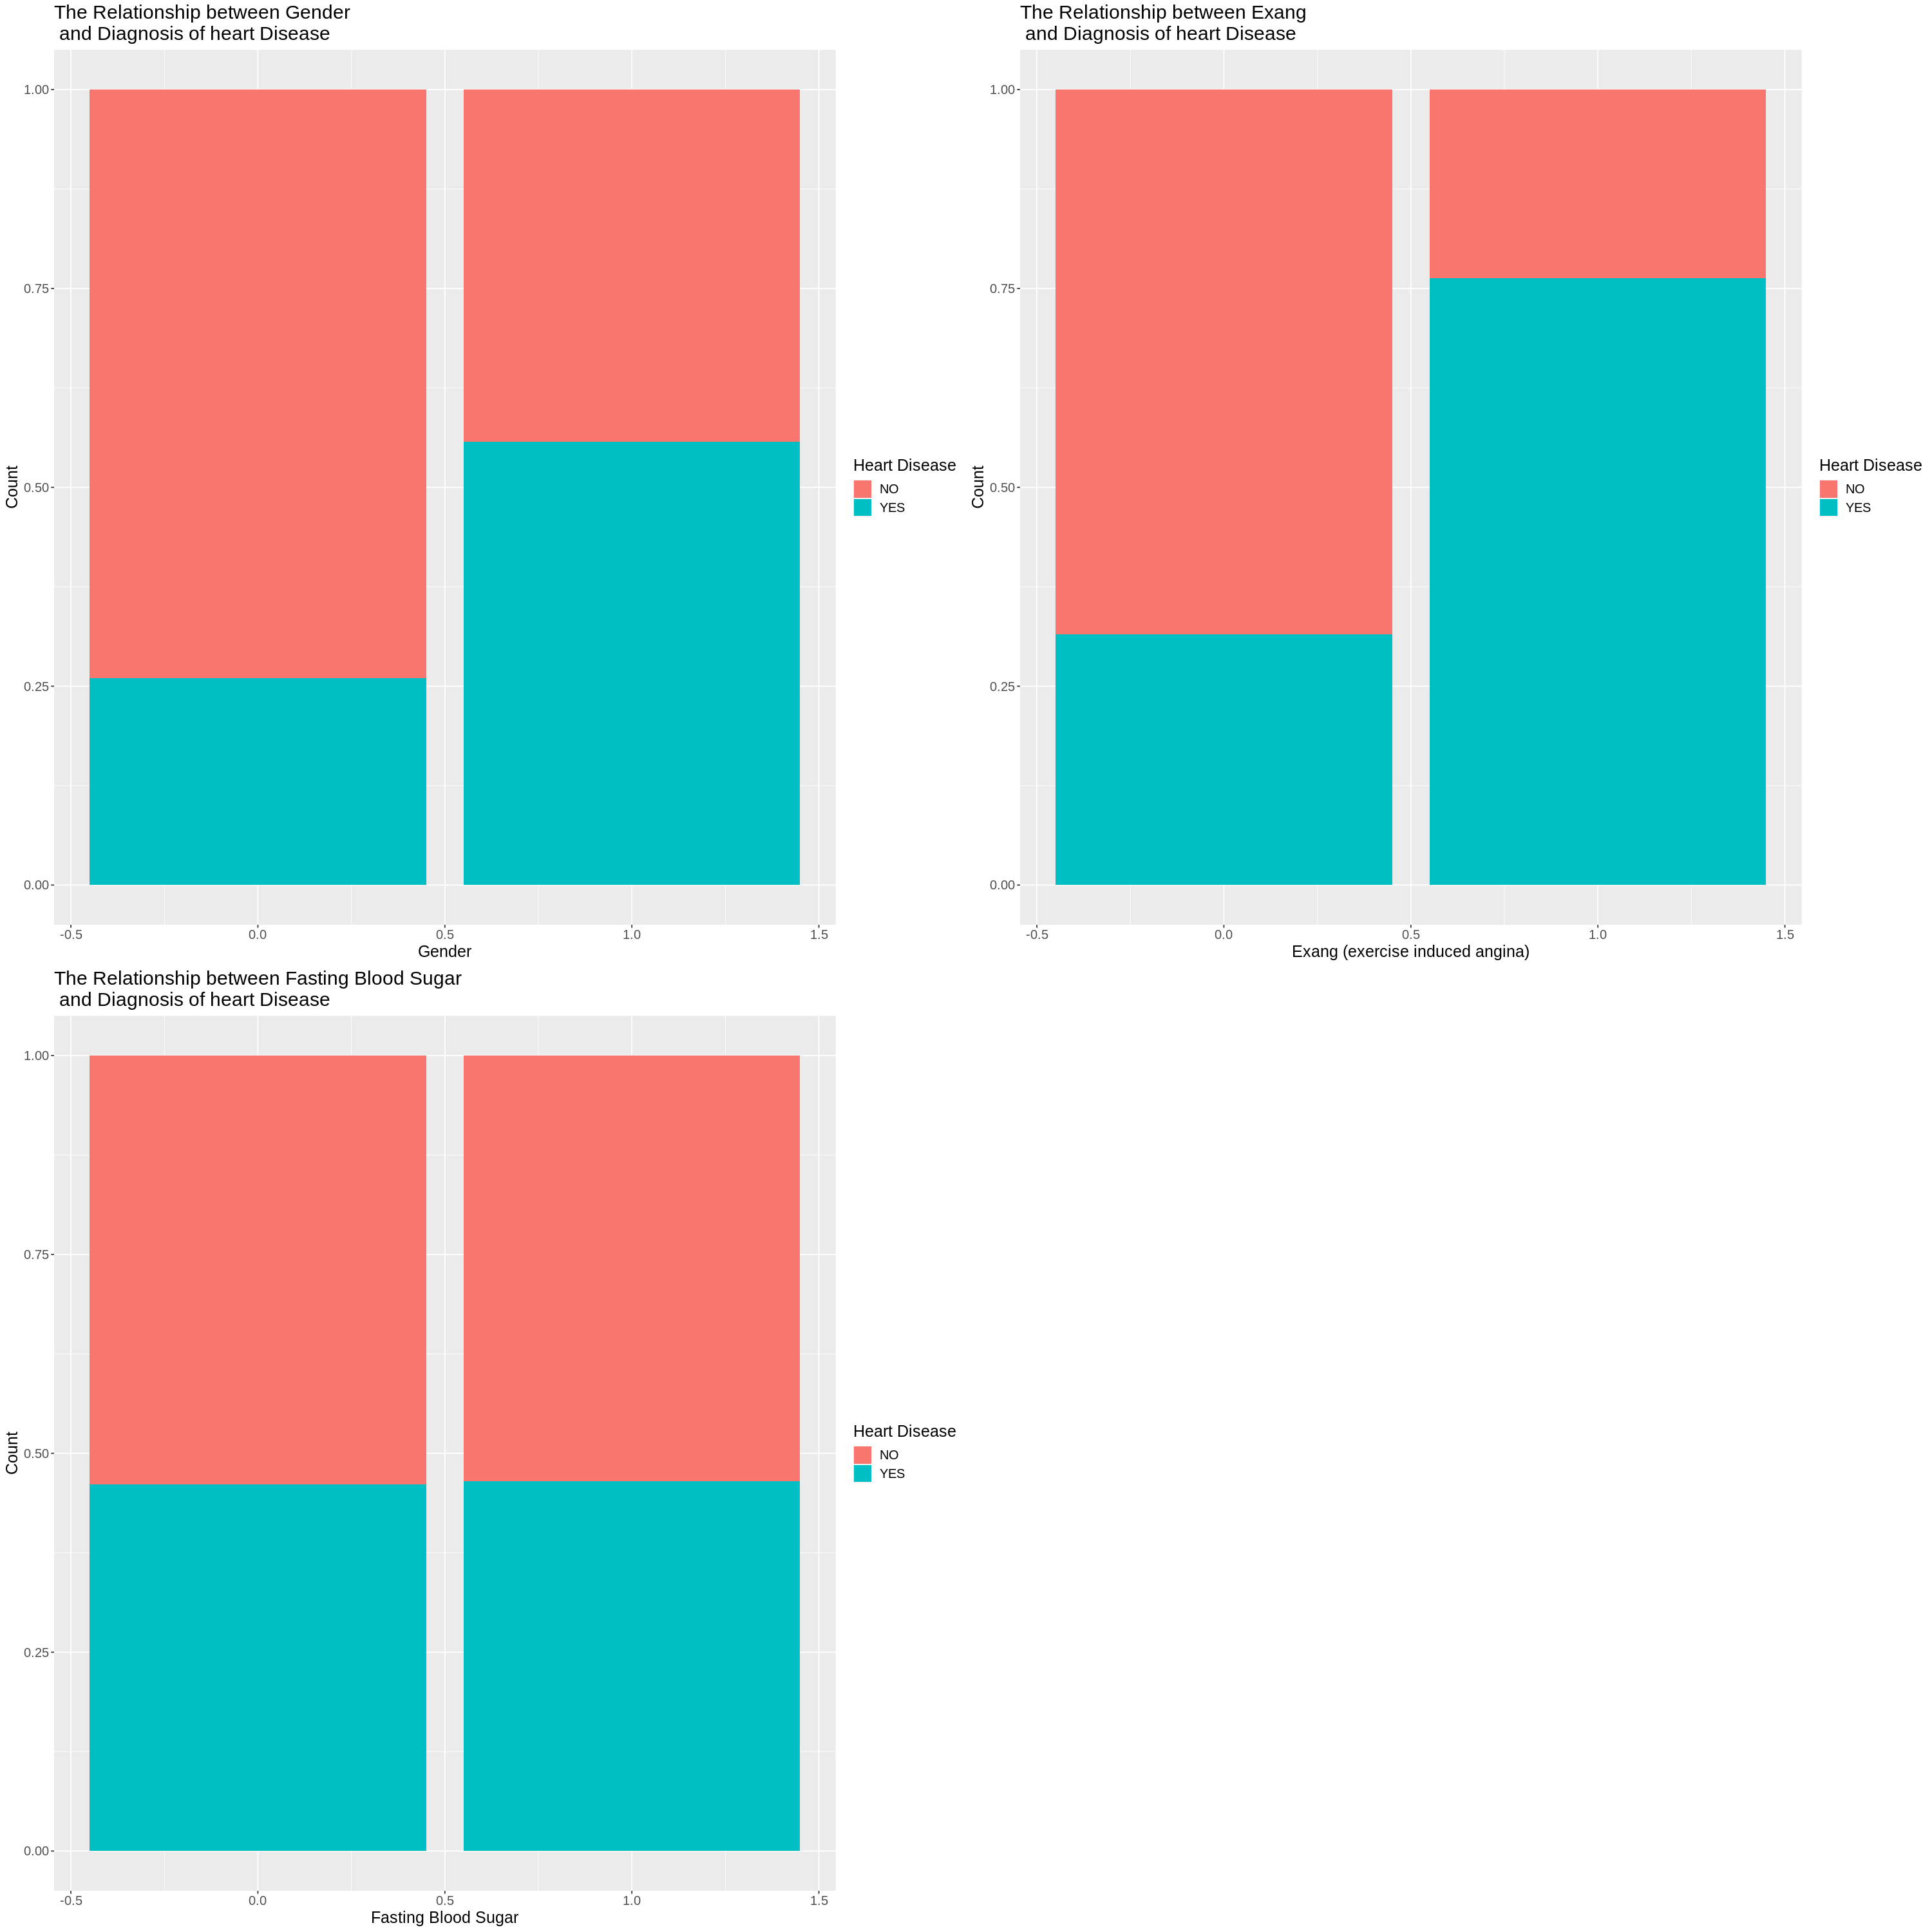

In [17]:
options(repr.plot.width = 25, repr.plot.height = 25)

sex_plot <- heart_dis_clean |>
    ggplot(aes(x = sex, fill = target)) +
    geom_bar(position = "fill")+
    labs(x = "Gender", y = "Count", fill = "Heart Disease") +
    ggtitle("The Relationship between Gender \n and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

exang_plot <- heart_dis_clean |>
    ggplot(aes(x = exang, fill = target)) +
    geom_bar(position = "fill")+
    labs(x = "Exang (exercise induced angina)", y = "Count",  fill = "Heart Disease")+
    ggtitle("The Relationship between Exang \n and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

fbs_plot <- heart_dis_clean |>
    ggplot(aes(x = fbs, fill = target)) +
    geom_bar(position = "fill")+
    labs(x = "Fasting Blood Sugar", y = "Count", fill = "Heart Disease")+
    ggtitle("The Relationship between Fasting Blood Sugar \n and Diagnosis of heart Disease")+
    theme(text = element_text(size = 15))

grid.arrange(sex_plot, exang_plot, fbs_plot, nrow = 2)

*[Figure 17]*

*[Figure 18]*

*[Figure 19]*

These figures describe the distribution of the binary variables with exactly 2 possible values. Here, the general and clear trend is that males and people who have exang have a higher chance of a heart disease. Whether the person has fasting blood sugar or not makes no difference.

# Predictor Variable Selection Analysis

Now that we have our testing and training data, we want to determine which combination of our predictor values will be the most accurate. We have already used summaries and visualisations to get a little intuition of whether a predictor will cause heart disease or not. Now, we will apply the Foward Selection approach with our training data set to choose the most effective predictor variables to use for our classifier. First, let's select for the predictors we are working with and get the column names of our predictor variables. We will store the relevant column names in predictor_names.

In [ ]:
options(repr.plot.width = 8, repr.plot.height = 7)

In [ ]:
predictor_names <- colnames(heart_training |> select(-target))
predictor_names

We will now create a model formula using the paste function. We will be naming this hrt_formula.

In [ ]:
hrt_formula <- paste("target", "~", paste(predictor_names, collapse = "+"))
hrt_formula

Now, we will apply the code for the Foward Selection method to find the best predictors for our purposes. The scaffolding for the code below can be found in the datasciencebook.ca under chapter 6 and was created by Campbell and Timbers (Campbell et al., 2022).

In [ ]:
set.seed(90)

# Empty tibble to store our results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# Here, we create the model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
     set_engine("kknn") |>
     set_mode("classification")

# Here, we use a 5-fold cross validation for the sake of time and computational power 
heart_vfold <- vfold_cv(heart_training, v = 5, strata = target)

# Stores number of total predictors
n_total <- length(predictor_names)

# Stores the selected predictors
selected <- c()

# Iterates from 1 to the total number of predictors
# Outside part of nested for loop 
for (i in 1:n_total) {    
    accs <- list()
    models <- list()
    
    # Iterates until every predictor is added 
    #Inside part of nested for loop 
    for (j in 1:length(predictor_names)) {
        
        # Model string for this combination of predictors
        preds_new <- c(selected, predictor_names[[j]])
        model_string <- paste("target", "~", paste(preds_new, collapse="+"))

        # Recipe from the model string; scales all predictors 
        heart_recipe <- recipe(as.formula(model_string), 
                                data = heart_training) |>
                          step_scale(all_predictors()) |>
                          step_center(all_predictors())

        # Here, we tune the classifier with our chose predictors
        # and collect the estimated accuracy
        
        acc <- workflow() |>
          add_recipe(heart_recipe) |>
          add_model(knn_spec) |>
          tune_grid(resamples = heart_vfold, grid = 10) |>
          collect_metrics() |>
          filter(.metric == "accuracy") |>
          summarize(mx = max(mean))
        acc <- acc$mx |> unlist()

        
        # Adding the results to the dataframe
        
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies |> 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, predictor_names[[jstar]])
    predictor_names <- predictor_names[-jstar]
}
accuracies

To find out which group of predictors can give us the highest accuracy, we will plot the estimated accuracy against the number of predictors. 

In [ ]:
best_pred_plot <- accuracies |>
                  ggplot( aes(x = size, y = (100 * accuracy))) +
                  geom_point() +
                  geom_line() +
                  labs(x = "Number of Predictors", y = "Estimated Accuracy %") +
                  theme(text = element_text(size = 16)) +
                  scale_x_continuous(breaks = seq(0, 10, by = 1))
best_pred_plot
head(accuracies)

From the figure above we can see that the 5 predictors: oldpeak (ST Depression Segment), cp (Chest Pain), exang (Exercise induced angina), age, and thalach (Maximum Heart Rate produced by patient) are the actual best combination of predictor variables to use for our classifier. This is different than the variables we chose above during our preliminary data analysis. Hence, we will use the predictor variables that obtained the highest acccuracy from the Forward Selection method to build our classifier.

# Creating Our Classifier

Now that we know which predictors to use for our classifier, we still ahve one issue that needs to be addressed, what value of $k$ should we pick? 
To find the best value for $k$, we will firstly conduct a V-fold Cross Validation. V-fold Cross Validation allows us to create a model, tune it, and graph the results to figure out the $k$ value which obtains the maximum accuracy.
We will follow th efollowig recipe (given below) to do our V-fold Cross Validation:
1. Create a recipe called heart_recipe using the heart training data and then split data into 10 v-folds
2. Specify the model for v-fold cross validation using the nearest_neighbor() and neighbors = tune() functions 
         for a range of possible predictor values
3. Put this and the recipe in a workflow() that contains multiple analysis steps
4. Plot accuracies against each k value to determine the best k value


In [ ]:
set.seed(2022)
options(repr.plot.width = 12, repr.plot.height = 7)


heart_vfold <- vfold_cv(heart_training, v = 10, strata = target)


heart_recipe <- recipe(target ~ oldpeak + thal + ca + exang + fbs, data = heart_training)|>
                step_scale(all_predictors()) |>
                step_center(all_predictors())

# Using the nearest_neighbour() function and inputting the weuight_func = "rectangular", so that each neighbour can only vote once

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
                set_engine("kknn")|>
                set_mode("classification")

k_vals <- tibble(neighbors=seq(from=1, to=20, by=1))

heart_results <- workflow()|>
                add_recipe(heart_recipe)|>
                add_model(knn_spec)|>
                tune_grid(resamples = heart_vfold, grid = k_vals)|>
                collect_metrics()|>
                filter(.metric == "accuracy") 

# Now that we have the accuracies, we will plot the graph of accuracy compared to the value of K, to find which value gives us the
# most accurate value



heart_plot <- heart_results |>
                ggplot(aes(x = neighbors, y = mean))+
                geom_point()+
                geom_line()+
                labs(x = "Neighbors", y = "Accuracy Estimate")+
                scale_y_continuous(limits = c(0.4, 1.0))+
                theme(text = element_text(size = 20))

heart_plot

In [ ]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 7) |>
                set_engine("kknn")|>
                set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(heart_recipe) |>
  add_model(knn_spec) |>
  fit(data = heart_testing)

heart_predictions <- predict(knn_fit, heart_testing) |>
  bind_cols(heart_testing)

heart_predictions

In [ ]:
confusion <- heart_predictions |>
    mutate(target = as_factor(target)) |>
    conf_mat(truth = target, estimate = .pred_class)

confusion

This confusion matrix tells us that the classifier got the diagnosis correct 63 times but also got it wrong 12 times. But this table is not an effective looking visualization so we will try to make it a bit better.

In [ ]:
T <- as.factor(c("FALSE", "FALSE" , "TRUE", "TRUE"))
P <- as.factor(c("TRUE", "FALSE", "TRUE", "FALSE"))
Results      <- c((6/75)*100,(34/75)*100 , (29/75)*100, (6/75)*100)
matrix_data <- as_tibble(T, P, Results)
ggplot(data =  matrix_data, mapping = aes(x = T, y = P)) +
  geom_tile(aes(fill = Results), colour = "white") +
  geom_text(aes(label = str_c(round(Results), "%")), size = 8) +
  labs(x = "Truth", y = "Predictor", fill = "Accuracy") +
  scale_fill_gradient(low = "white", high = "") +
  theme(text = element_text(size = 20)) +
  ggtitle("Confusion Matrix Plot")

In [ ]:
heart_percentage <- heart_predictions |> 
    mutate(target = as_factor(target)) |>
    metrics(truth = target, estimate = .pred_class) |> 
    select(.metric, .estimate) |> 
    head(1)

heart_percentage

By using Forward Selection Analysis to choose the best predictors and Cross-Validation tests to determine the best k-value, we have created a classifier that has an 84% accuracy

# Discussion

We first performed preliminary data analysis to clean and wrangle our data. We added column names, selected columns for the variables we are interested in, cleaned up the data into a tidy data format, and split the data into a training set and testing set. The variables we chose to use for our preliminary-analysis were age, chest pain, resting blood pressure and cholesterol level. Before performing K-NN classification, we performed Forward Variable selection to find the best predictors. We found that the actual best predictors that gave us the highest accuracy are oldpeak (ST Depression Segment), cp (Chest Pain), exang (Exercise induced angina), age, and thalach (Maximum Heart Rate produced by patient). We then performed 10-fold cross validation on our training data to find the best 
k
-value that gives us the highest accuracy and used that value to create our model. To evaluate our model on the testing data, we found out the accuracy value and visualized the results using a confusion matrix.

We found our model to have an accuracy of 84%. This is about the same as the accuracy we expected our model to have based on the estimate accuracy provided by the Foward Selection model. Based on the amount of incorrect predictions and our prediction accuracy, we believe our model is not adequete enough to be used in a real world setting because the room for error is far too great and a false negative prediction can lead to expensive and detrimental consequences for a patient. Therefore, we believe we are unable to fullfill this paper's claim which is to take the Heart Disease dataset from the Cleveland database to create an adequate model to predict whether a patient has heart disease. Hospitals and health institutions should try and predict heart disease with an accuracy as close to 100% as possible. Regardless, this model does give a base knowledge on how to predict heart disease as well as granting an overall understanding on the various causes of heart disease. To improve our classifier, one improvement that could have been made is a bigger dataset, as our data set only included 303 observations.

With heart disease being the second leading cause of death after cancer, it is essential that we know the factors that impact our heart's health so we can prevent complications in the future. A better understanding of how different variables contribute to heart disease is necessary to understand how to prevent heart disease. For example, based on our preliminary analysis of chest pain, we can confidently support the claim that severe irregular chest pain is a good indicator of heart disease (Deeana, 2014). Unfortunately because our model's overall accuracy was only 84% (based on the test data) and the numerous number of mistakes our model made, it is hard to derive any useful information or relationships.

This could lead to future questions such as how can we better prevent heart disease early in age? What factors result in heart disease for young people? What is the greatest cause for heart disease? Does this data change when looking at different countries? Lastly, what other factors affect heart disease that weren't included in the dataset?

# References

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano , R. (2007). Heart Disease Data Set. Index of/ml/machine-learning-databases/heart-disease. Retrieved December 1, 2022, from https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

Campbell, T., & Timbers, T. (2022, September 24). Data science. Chapter 6 Classification II: evaluation & tuning. Retrieved December 1, 2022, from https://datasciencebook.ca/classification2.html#predictor-variable-selection


Kelley, Deeanna. "Heart Disease: Causes, Prevention, and Current Research," JCCC Honors Journal: Vol. 5: Iss. 2, Article 1, (2014). Available at: http://scholarspace.jccc.edu/honors_journal/vol5/iss2/1

Vanderpump, M., Tunbridge, W., French, J., Appleton, D., Bates, D., Clark, F., Evans, J. G., Rodgers, H., Tunbridge, F., &amp; Young, E. (2009). The development of ischemic heart disease in relation to autoimmune thyroid disease in a 20-year follow-up study of an english community.: Semantic scholar. Thyroid : official journal of the American Thyroid Association. Retrieved April 15, 2023, from https://www.semanticscholar.org/paper/The-development-of-ischemic-heart-disease-in-to-in-Vanderpump-Tunbridge/600d551dff5ce344a3ed1616dd042358c02268c9